# Проектная работа по модулю “Математика и статистика в Python”

In [122]:
# импорты
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 1.Загрузить файл hr.csv.

In [44]:
dataset = pd.read_csv(filepath_or_buffer='HR.csv')

departments = {}
salaries = {}
id = 0
for dept in dataset['sales'].unique():
    departments[dept] = id
    id+=1
    
id = 0
for salary in dataset['salary'].unique():
    salaries[salary] = id
    id+=1
        

def set_dept_id(row, depts):
    """
    Поиск ИД департамента
    """
    res = depts[row['sales']]
    return res

def set_salaty_id(row, salaries):
    """
    Поиск ИД уровня ЗП
    """
    res = salaries[row['salary']]
    return res
    
dataset['dept_id'] = dataset.apply(set_dept_id, depts=departments, axis=1)
dataset['salary_id'] = dataset.apply(set_salaty_id, salaries=salaries, axis=1)


,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,dept_id,salary_id
0,0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,1
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,1
3,3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0
4,4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,0.40,0.57,2,151,3,0,1,0,support,low,4,0
14995,14995,0.37,0.48,2,160,3,0,1,0,support,low,4,0
14996,14996,0.37,0.53,2,143,3,0,1,0,support,low,4,0
14997,14997,0.11,0.96,6,280,4,0,1,0,support,low,4,0


In [40]:
print(dataset.head(15))
print(departments)
print(salaries)

    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.38             0.53               2                   157   
1                 0.80             0.86               5                   262   
2                 0.11             0.88               7                   272   
3                 0.72             0.87               5                   223   
4                 0.37             0.52               2                   159   
5                 0.41             0.50               2                   153   
6                 0.10             0.77               6                   247   
7                 0.92             0.85               5                   259   
8                 0.89             1.00               5                   224   
9                 0.42             0.53               2                   142   
10                0.45             0.54               2                   135   
11                0.11      

### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [225]:
# напишем для этого функцию, которой будем передавать столбец (series)
def get_basic_stats(col):
    result = {}
    result['mean'] = statistics.mean(col)
    result['median'] = statistics.median(col)
#     result['mode'] = statistics.multimode(col)  # в датасете встречаются значения с одинаковым максимальным повторением, метод добавлен в Python 3.8
    result['min'] = min(col)
    result['max'] = max(col)
    result['st.dev'] = statistics.stdev(col) # стандартное отклонение
    result['av.dev'] = result['st.dev']**2 # его квадрат => среднеквадратичное отклонение
    return result

basic_stats = {}
basic_stats['satisfaction_level'] = get_basic_stats(dataset['satisfaction_level'])
basic_stats['last_evaluation'] = get_basic_stats(dataset['last_evaluation'])
basic_stats['number_project'] = get_basic_stats(dataset['number_project'])
basic_stats['average_montly_hours'] = get_basic_stats(dataset['average_montly_hours'])
basic_stats['time_spend_company'] = get_basic_stats(dataset['time_spend_company'])
basic_stats['Work_accident'] = get_basic_stats(dataset['Work_accident'])
basic_stats['promotion_last_5years'] = get_basic_stats(dataset['promotion_last_5years'])
# опускаем колонки left (очевидно, покинул компанию), sales (департамент) и salary (уровень ЗП, хотя в теории можно конвертировать колонку в числа, но будем смотреть по следующим задачам)

for st in basic_stats:
    print(f'{st}: {basic_stats[st]}')

satisfaction_level: {'mean': 0.6128335222348157, 'median': 0.64, 'min': 0.09, 'max': 1.0, 'st.dev': 0.24863065106114257, 'av.dev': 0.061817200647087636}
last_evaluation: {'mean': 0.7161017401160077, 'median': 0.72, 'min': 0.36, 'max': 1.0, 'st.dev': 0.17116911062327533, 'av.dev': 0.029298864431563067}
number_project: {'mean': 3.80305353690246, 'median': 4, 'min': 2, 'max': 7, 'st.dev': 1.2325923553183522, 'av.dev': 1.519283914389243}
average_montly_hours: {'mean': 201.0503366891126, 'median': 200, 'min': 96, 'max': 310, 'st.dev': 49.94309937128408, 'av.dev': 2494.313174809956}
time_spend_company: {'mean': 3.498233215547703, 'median': 3, 'min': 2, 'max': 10, 'st.dev': 1.4601362305354812, 'av.dev': 2.131997811722364}
Work_accident: {'mean': 0.1446096406427095, 'median': 0, 'min': 0, 'max': 1, 'st.dev': 0.35171855238017985, 'av.dev': 0.12370594008840932}
promotion_last_5years: {'mean': 0.021268084538969265, 'median': 0, 'min': 0, 'max': 1, 'st.dev': 0.14428146457858235, 'av.dev': 0.020817

### 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

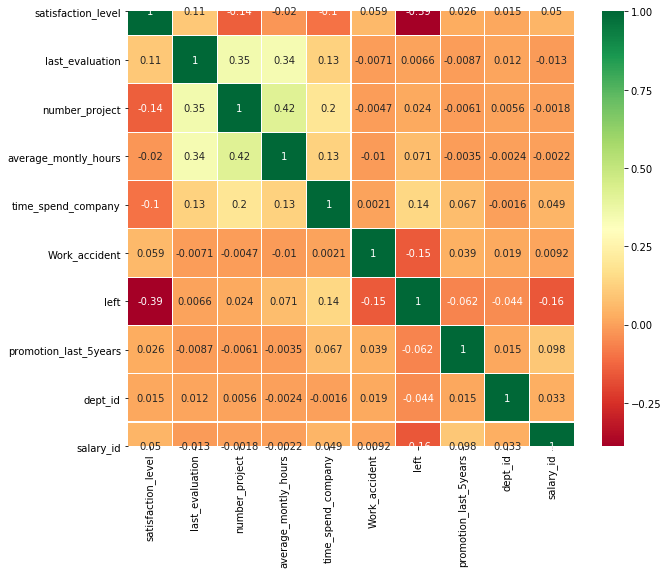

In [41]:
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 4.Визуализировать несколько взаимосвязей между переменными.

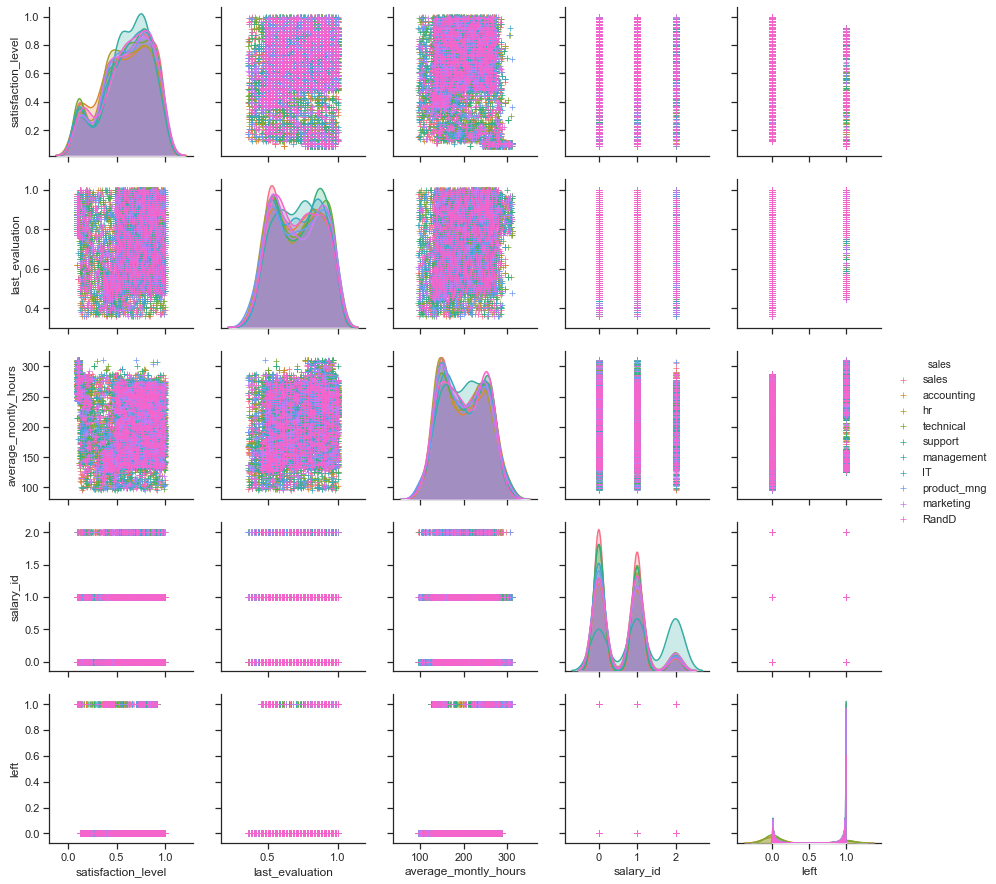

In [57]:
sns.set(style="ticks", color_codes=True)
# hr = sns.load_dataset("hr")
g = sns.pairplot(data=dataset[['satisfaction_level','last_evaluation','average_montly_hours', 'salary_id', 'left', 'sales']], hue='sales', palette="husl", markers='+')

не особо красноречивые графики, попробуем еще

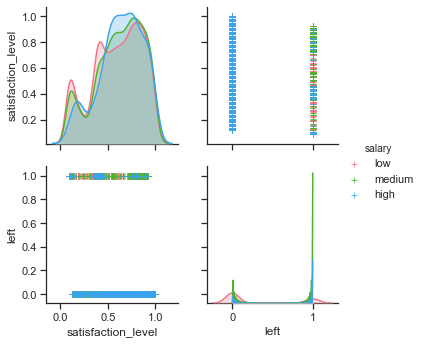

In [172]:
g = sns.pairplot(data=dataset[['satisfaction_level','left', 'salary']], hue='salary', palette="husl", markers='+')

с высокой зарплатой не уходят? (1 строка, 2 столбец)

(array([4140.,  767.,  739., 2720., 2229.,  630., 1227.,  902.,  858.,
         787.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

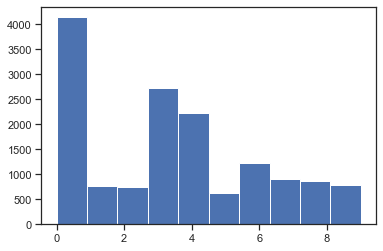

In [66]:
plt.hist(dataset['dept_id'])


больше всего продажников, тех.персонала и саппорта - ИТ компания

(array([3244., 6443., 2557., 1473.,    0.,  718.,  188.,  162.,    0.,
         214.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

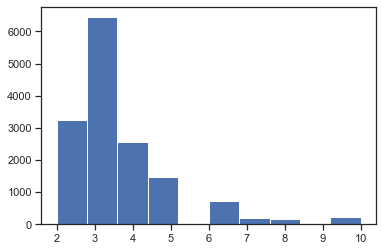

In [67]:
plt.hist(dataset['time_spend_company'])


провалы в количестве отработанного времени в компании - можно прикинуть, когда у компании начался рост.

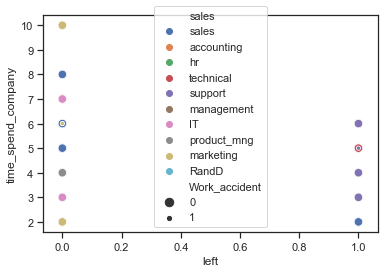

In [68]:
g = sns.scatterplot(data=dataset, x='left', y='time_spend_company', hue='sales', size='Work_accident')

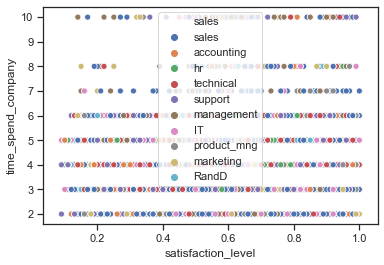

In [70]:
g = sns.scatterplot(data=dataset, x='satisfaction_level', y='time_spend_company', hue='sales')

Нашелся первый точный вывод: кто очень долго работает - не увольняется несмотря на низкую удовлетворенность работой

В остальном, очевидных закономерностей выявить на данном этапе не удается - хотя, как правило в HR данных нюансы по увольнениям бросаются в глаза очень явно (или это особенности пост-СССР)

### 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [74]:
number_project = dataset['number_project']
average_montly_hours = dataset['average_montly_hours']
stats.ttest_ind(number_project, average_montly_hours)

Ttest_indResult(statistic=-483.54229603425085, pvalue=0.0)

Несмотря на то, что визуально есть некая взаимосвязь количества часов от количества проектов, p-value меньше 0.05, что говорит о том, что это не так

In [77]:
last_evaluation = dataset['last_evaluation']
average_montly_hours = dataset['average_montly_hours']
stats.ttest_ind(last_evaluation, average_montly_hours)

Ttest_indResult(statistic=-491.25647025928, pvalue=0.0)

Повышение и количество часов тоже не сходятся.

Попробуем другую связь: повышение и количество часов в рамках подразделений бухгалтерии и поддержки, по частотным графикам они очень схожи

In [78]:
last_evaluation = dataset[dataset['sales']=='accounting']['last_evaluation']
average_montly_hours = dataset[dataset['sales']=='accounting']['average_montly_hours']
stats.ttest_ind(last_evaluation, average_montly_hours)

Ttest_indResult(statistic=-108.61749706946526, pvalue=0.0)

In [79]:
last_evaluation = dataset[dataset['sales']=='support']['last_evaluation']
average_montly_hours = dataset[dataset['sales']=='support']['average_montly_hours']
stats.ttest_ind(last_evaluation, average_montly_hours)

Ttest_indResult(statistic=-188.79172508577852, pvalue=0.0)

Снова нет

Но для того чтобы здесь был классный результат с графиком, возьмем очевидную корреляцию среднего количества часов отделов продаж и ИТ

In [80]:
sales = dataset[dataset['sales']=='sales']['average_montly_hours']
IT = dataset[dataset['sales']=='IT']['average_montly_hours']
stats.ttest_ind(sales, IT)

Ttest_indResult(statistic=-0.805626888012719, pvalue=0.42049372153216147)

P-value сильно больше 0.05, супер!

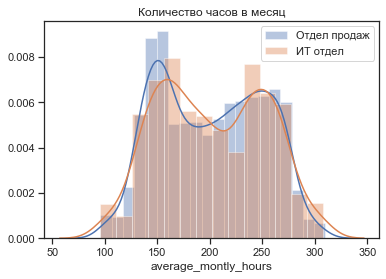

In [82]:
sns.distplot(sales)
sns.distplot(IT)
plt.title('Количество часов в месяц')
plt.legend(['Отдел продаж', 'ИТ отдел'])
plt.show()

### 6.Рассчитать сколько работников работает в каждом департаменте.

In [91]:
workers = {}
for dept in departments:
    workers[dept] = dataset.loc[(dataset['sales']==dept) & (dataset['left']==0)]['left'].count()
    print(f'{dept}: {workers[dept]}')


sales: 3126
accounting: 563
hr: 524
technical: 2023
support: 1674
management: 539
IT: 954
product_mng: 704
marketing: 655
RandD: 666


### 7.Показать распределение сотрудников по зарплатам.

работающие

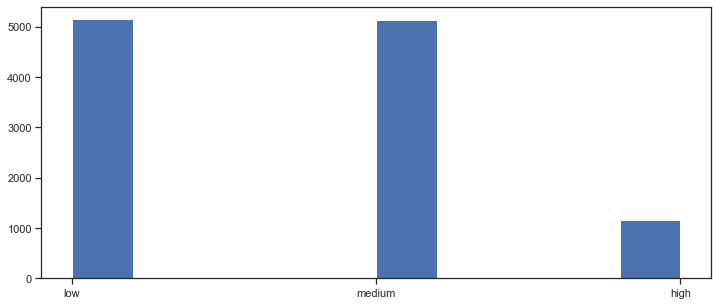

In [106]:
plt.hist(dataset.loc[dataset['left']==0]['salary'])
plt.show()

все

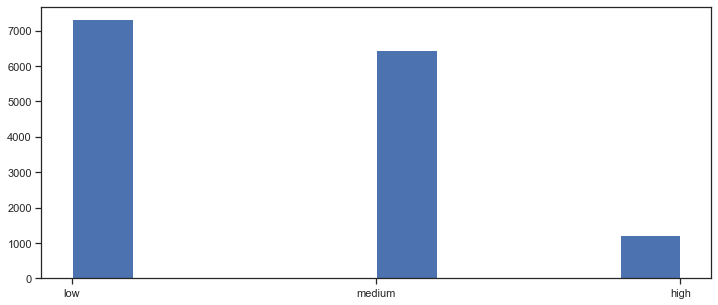

In [105]:
plt.hist(dataset['salary'])
plt.show()

уволенные

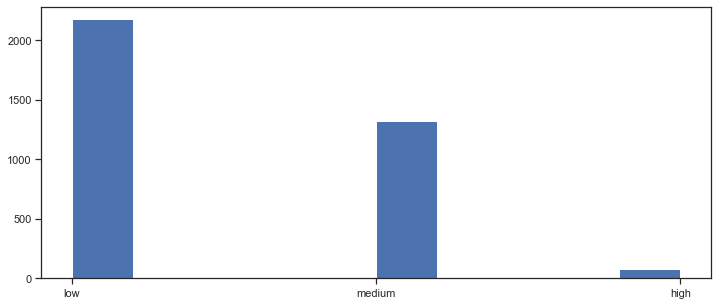

In [107]:
plt.hist(dataset.loc[dataset['left']==1]['salary'])
plt.show()

### 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

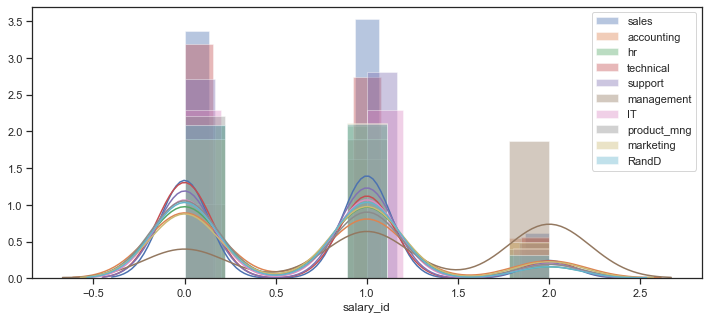

In [104]:
plt.rcParams['figure.figsize'] = [12, 5]
lgd = []
for dept in departments:
    sns.distplot(dataset.loc[(dataset['sales']==dept) & (dataset['left']==0)]['salary_id'])
    lgd.append(dept)
plt.legend(lgd) 

plt.show()

### 9.Сколько сотрудников покинули компанию.

In [110]:
total_left = dataset.loc[dataset['left']==1]['salary'].count()
print(f'Всего покинуло {total_left} человек')

Всего покинуло 3571 человек


### 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Начинаем хитрую аналитику, попоробуем такой тезис: "Неудовлетворенность ведет к увольнению"
в датасете берем только уволенных

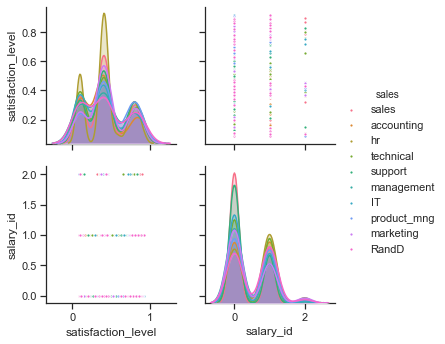

In [173]:
g = sns.pairplot(data=dataset.loc[dataset['left']==1][['satisfaction_level','sales', 'salary_id']], hue='sales', palette="husl", markers='.')

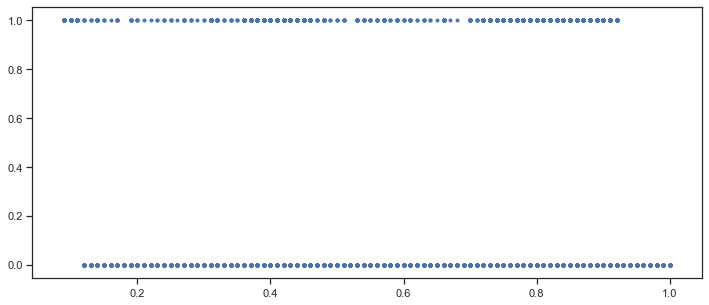

In [115]:

plt.scatter(dataset['satisfaction_level'], dataset['left'], marker='.')

Есть три пика увольнения, когда все плохо; ниже середины; и высокая удовлетворенность.  
А еще есть текучка, чем ниже зарплата.  
А еще HRы убегают - видимо, есть с чем сравнивать.  
 
Строим pairplot и режем его на работающих и уволенных:

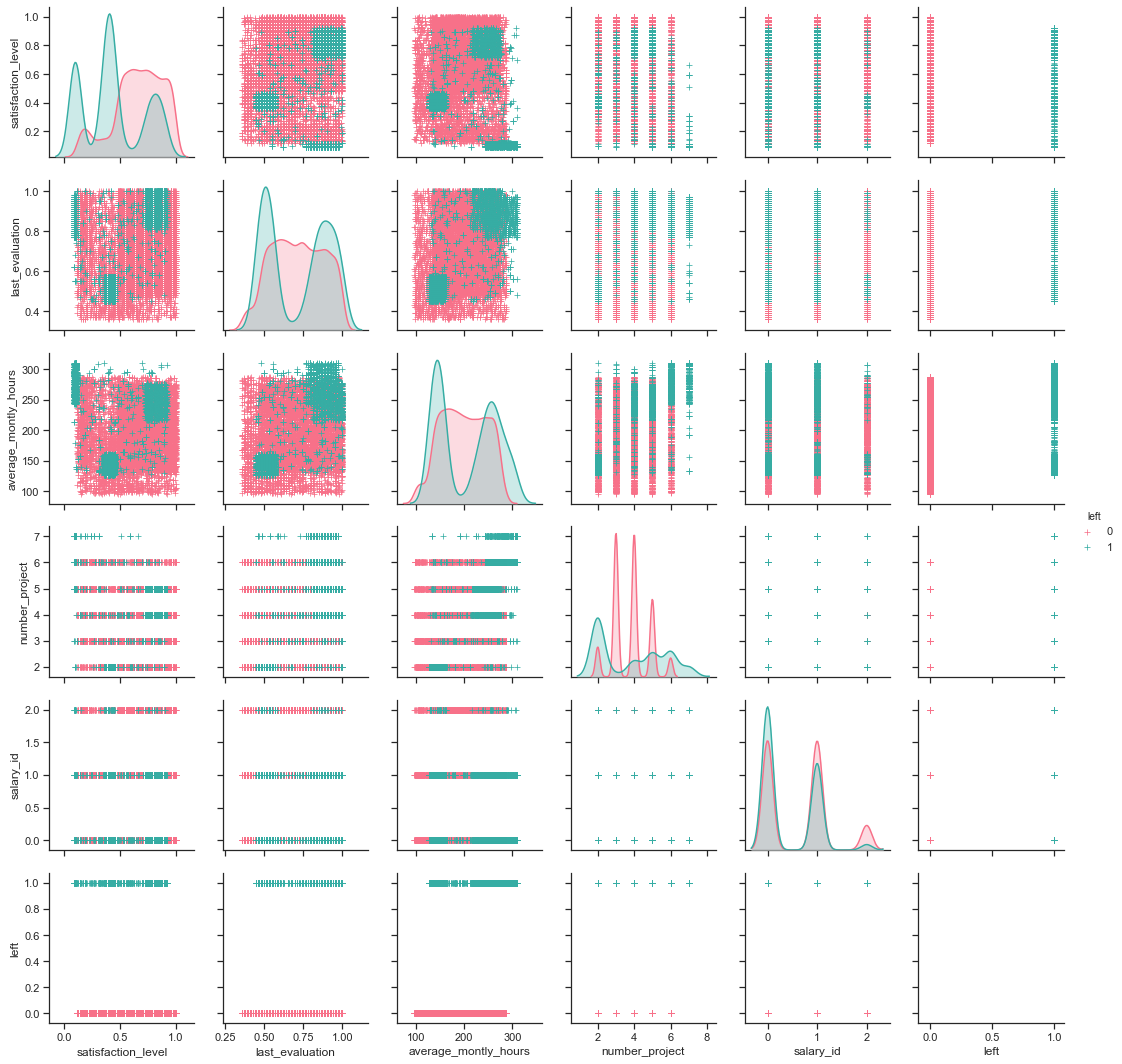

In [117]:
g = sns.pairplot(data=dataset[['satisfaction_level','last_evaluation','average_montly_hours', 'number_project', 'salary_id', 'left', 'sales']], hue='left', palette="husl", markers='+')

**Диаграмма 1.1**: три пика увольнений: полная неудовлетворенность, неудовлетворенность ниже середины (очевидно, нарастающая), полная удовлетворенность (дальнейший рост или увольнение по инициативе работодателя).  
**Диаграмма 2.1 и 1.2**: объясняет средний пик неудовлетворенности - это увольнение по итогам оценки работы.  
**Диаграмма 2.2**: не несет конкретики - показывает два пика увольнений - после недавней оценки сотрудника, и увольнение надежных сотрудников, ровный график работающих.  
**Диаграмма 3.1 и 1.3**: первый пик - неудовлетворенность от высокой загрузки, второй пик - подтверждает увольнение лентяев, третий может подтвердить увольнение с целью роста.  
**Диаграмма 3.2**: нижняя левая группа показывает увольнение после оценки, правая верхняя - из такого графика можно предположить, что сотрудники имели большие ожидания.  
**Диаграмма 3.3**: два пика ушедших - с низкой и с высокой загрузкой, у оставшихся график равномерный.  
**Диаграмма 4.1 и 1.4**: во первых - все с 7 проектами уволились, и их удовлетворенность была невысока; группа уволившихся с высокой удовлетворенностью имела 4-5 проектов - могли уйти в штат клиенту если аутсорс.  
**Диаграмма 4.2 и 2.4**: есть интересная нижняя группа - те, у кого недавно была оценка персонала и минимум проектов - их с большой долей вероятности уволили; а также есть весьма плотная группа тех, кто ушел, у кого давно не было оценки, однако нагрузка приличная.  
**Диаграмма 4.3**: видим группу уволенных с двумя проектами и низкой загрузкой - подтверждает вывод об увольнении; вторая группа уволившихся с высокой загрузкой и количеством проектов от 4 и более.  
**Диаграмма 4.4**: показывает плотный пик уволенных с низким количеством проектов, среди работающих показывает, что комфортное количество проектов 3-5.  
**Диаграмма 5.1 и 1.5**: показывает текучку на низкооплачиваемых вакансиях, на среднеоплачиваемых можно уловить два пика средней и высокой удовлетворенности, на высокооплачиваемых явный пик на уровне удовлетворенности около 40%  
**Диаграмма 5.2 и 2.5**: не очень выразительный график, есть пик увольнения от недавней оценки у высокооплачиваемых - возможно, критерии роста в другом месте или завышенные ожидания работодателя.  
**Диаграмма 5.3 и 3.5**: сверхвысокая загрузка - гарантированное увольнение при любой зарплате; увольнения при низкой загрузке - очевидно по инициативе работодателя.  
**Диаграмма 5.4 и 4.5**: такой дискретный график ничего не смог показать в этой реализации.  
**Диаграмма 5.5**: классическая текучка на низкооплачиваемых должностях, и ротация на среднеоплачиваемых, высокооплачиваемые более стабильны, хоть их доля и невысока.  
6 строка и столбец не имеют смысла для анализа


### Анализ 1
Поищем корреляцию в датасете уволенных между давностью оценки сотрудника и его нагрузкой в количестве часов


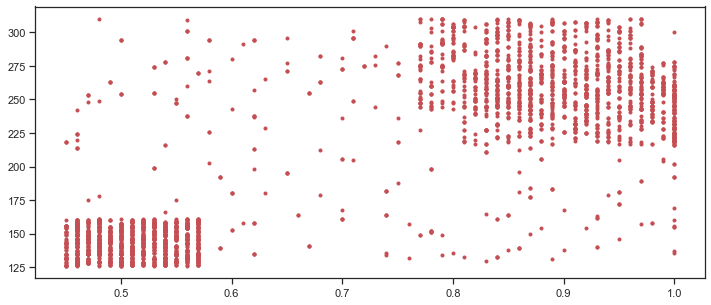

In [119]:
last_evaluation = dataset[dataset['left']==1]['last_evaluation']
average_montly_hours = dataset[dataset['left']==1]['average_montly_hours']
plt.plot(last_evaluation, average_montly_hours, 'r.')
plt.show()

# stats.ttest_ind(last_evaluation, average_montly_hours)

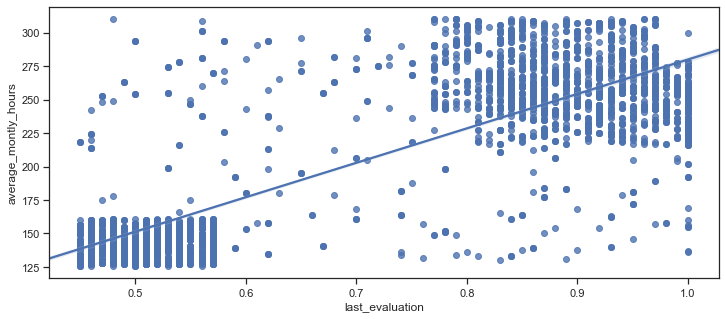

In [120]:

sns.regplot(x= last_evaluation, y=average_montly_hours,data=dataset, fit_reg=True)
plt.xlabel('last_evaluation')
plt.ylabel('average_montly_hours')
plt.grid(False)
plt.show()

Попробуем модель полиномиальной регрессии

In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    last_evaluation,
    average_montly_hours,
    test_size = 0.2,
    random_state = 42
)

In [131]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [144]:
poly_reg = PolynomialFeatures(degree=6)

X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test), y_test)

0.7706664189607361

Точность модели 77%, не ахти какие цифры без разбиения

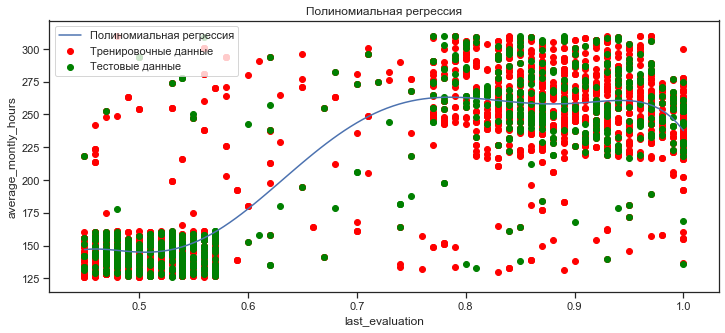

In [145]:
def viz_polymonial():
    plt.scatter(X_train, y_train, c='red')
    plt.scatter(X_test, y_test, c='green')
    x = np.linspace(min(X_test), max(X_train), 100)
    y = pol_reg.predict(poly_reg.fit_transform(x))
    plt.plot(x, y, 'b')
    plt.title('Полиномиальная регрессия')
    plt.xlabel('last_evaluation')
    plt.ylabel('average_montly_hours')
    plt.legend(['Полиномиальная регрессия', 'Тренировочные данные', 'Тестовые данные'])
    plt.show()
    return
viz_polymonial()

### Анализ2
А теперь поищем корреляцию увольнений от количества проектов и нагрузки в часах

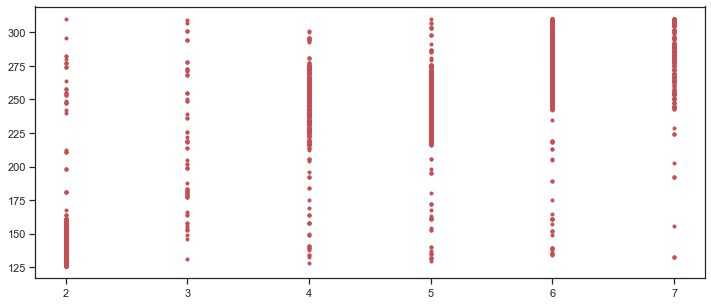

In [153]:
number_project = dataset[dataset['left']==1]['number_project']
average_montly_hours = dataset[dataset['left']==1]['average_montly_hours']
plt.plot(number_project, average_montly_hours, 'r.')
plt.show()

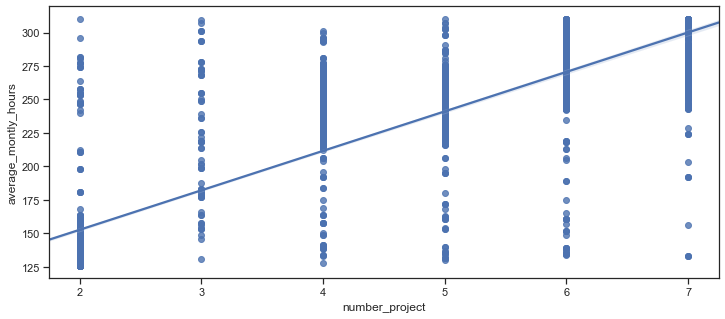

In [154]:

sns.regplot(x= number_project, y=average_montly_hours,data=dataset[['number_project','average_montly_hours']], fit_reg=True)
plt.xlabel('number_project')
plt.ylabel('average_montly_hours')
plt.grid(False)
plt.show()

In [167]:
X_train, X_test, y_train, y_test = train_test_split(
    number_project,
    average_montly_hours,
    test_size = 0.2,
    random_state = 42
)

In [168]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [169]:
poly_reg = PolynomialFeatures(degree=6)

X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test), y_test)

0.7898814092563015

Точность модели 79%

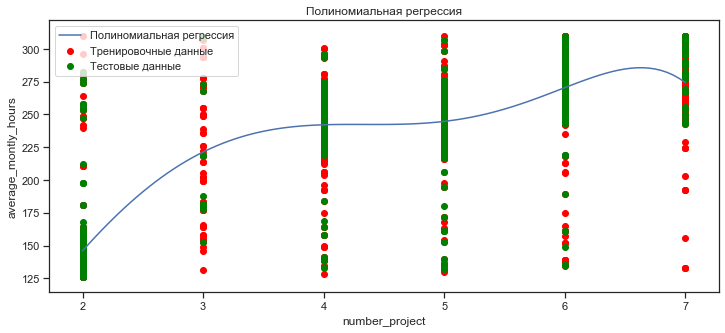

In [170]:
def viz_polymonial():
    plt.scatter(X_train, y_train, c='red')
    plt.scatter(X_test, y_test, c='green')
    x = np.linspace(min(X_test), max(X_train), 100)
    y = pol_reg.predict(poly_reg.fit_transform(x))
    plt.plot(x, y, 'b')
    plt.title('Полиномиальная регрессия')
    plt.xlabel('number_project')
    plt.ylabel('average_montly_hours')
    plt.legend(['Полиномиальная регрессия', 'Тренировочные данные', 'Тестовые данные'])
    plt.show()
    return
viz_polymonial()

про HRов все же интересно

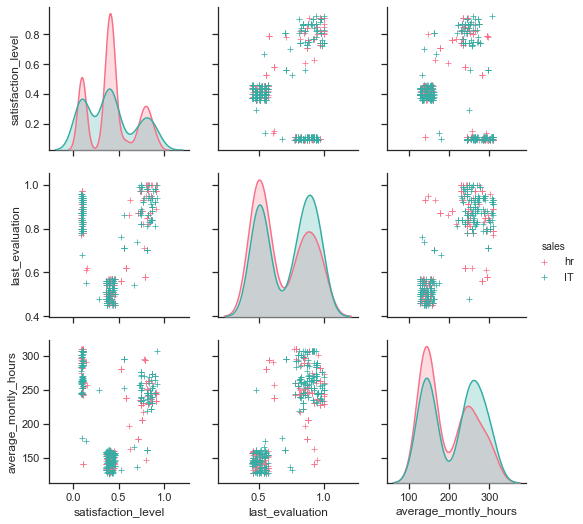

In [185]:
g = sns.pairplot(data=dataset.loc[(dataset['left']==1)&((dataset['sales']=='hr') |(dataset['sales']=='IT'))][['satisfaction_level','last_evaluation','average_montly_hours', 'sales']], hue='sales', palette="husl", markers='+')

Более резкий график, значит самые точные модели будут получаться по подразделениям.  
Повторим первый анализ для HR Отдела.

### Анализ 3
Поищем корреляцию в датасете уволенных между давностью оценки сотрудника и его нагрузкой в количестве часов но для HR


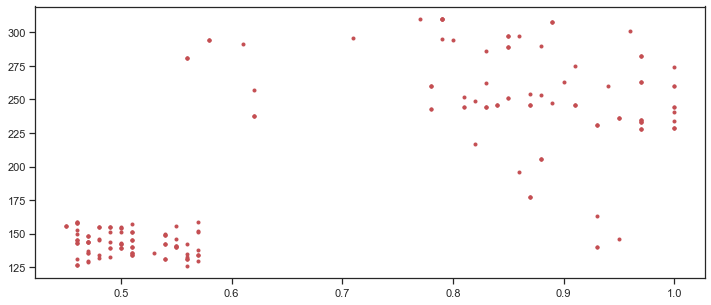

In [210]:
last_evaluation = dataset.loc[(dataset['left']==1)&(dataset['sales']=='hr')]['last_evaluation']
average_montly_hours = dataset.loc[(dataset['left']==1)&(dataset['sales']=='hr')]['average_montly_hours']
plt.plot(last_evaluation, average_montly_hours, 'r.')
plt.show()

# stats.ttest_ind(last_evaluation, average_montly_hours)

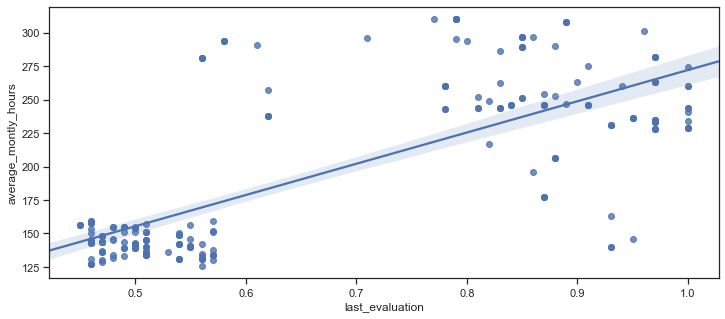

In [191]:

sns.regplot(x= last_evaluation, y=average_montly_hours,data=dataset.loc[(dataset['left']==1)&(dataset['sales']=='hr')][['last_evaluation','average_montly_hours']], fit_reg=True)
plt.xlabel('last_evaluation')
plt.ylabel('average_montly_hours')
plt.grid(False)
plt.show()

Попробуем модель полиномиальной регрессии

In [211]:
X_train, X_test, y_train, y_test = train_test_split(
    last_evaluation,
    average_montly_hours,
    test_size = 0.2,
    random_state = 42
)

In [212]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [213]:
poly_reg = PolynomialFeatures(degree=8)

X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test), y_test)

0.7354510834261945

### Точность модели 73.5% - гипотеза не подтвердилась

In [204]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6383443927905943

Однако, лучше чем у линейной регрессии

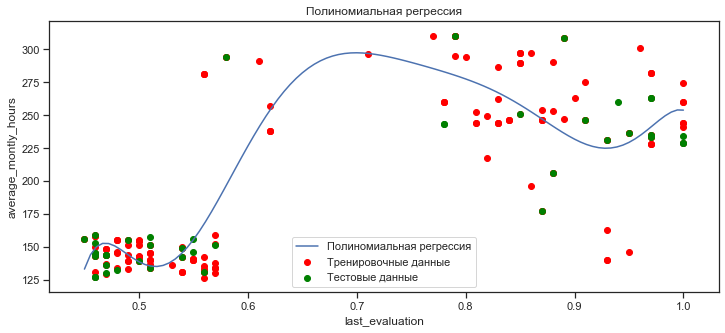

In [203]:
def viz_polymonial():
    plt.scatter(X_train, y_train, c='red')
    plt.scatter(X_test, y_test, c='green')
    x = np.linspace(min(X_test), max(X_train), 100)
    y = pol_reg.predict(poly_reg.fit_transform(x))
    plt.plot(x, y, 'b')
    plt.title('Полиномиальная регрессия')
    plt.xlabel('last_evaluation')
    plt.ylabel('average_montly_hours')
    plt.legend(['Полиномиальная регрессия', 'Тренировочные данные', 'Тестовые данные'])
    plt.show()
    return
viz_polymonial()

Попробуем более гладкую диаграмму IT отдела

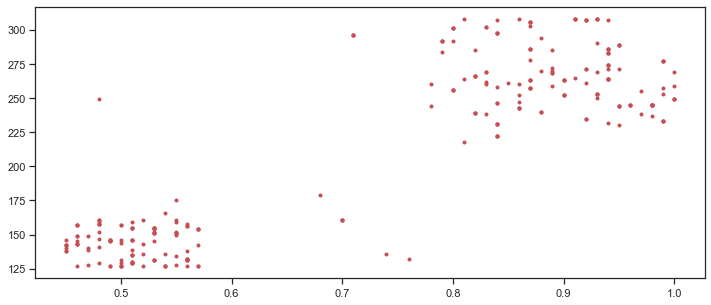

In [214]:
last_evaluation = dataset.loc[(dataset['left']==1)&(dataset['sales']=='IT')]['last_evaluation']
average_montly_hours = dataset.loc[(dataset['left']==1)&(dataset['sales']=='IT')]['average_montly_hours']
plt.plot(last_evaluation, average_montly_hours, 'r.')
plt.show()

# stats.ttest_ind(last_evaluation, average_montly_hours)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(
    last_evaluation,
    average_montly_hours,
    test_size = 0.2,
    random_state = 42
)

In [216]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [222]:
poly_reg = PolynomialFeatures(degree=3)

X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

pol_reg.score(poly_reg.fit_transform(X_test), y_test)

0.8260130972181327

### Точность модели 82,6%
это успех?

In [223]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7126740044397035

У линейной регрессии 71%

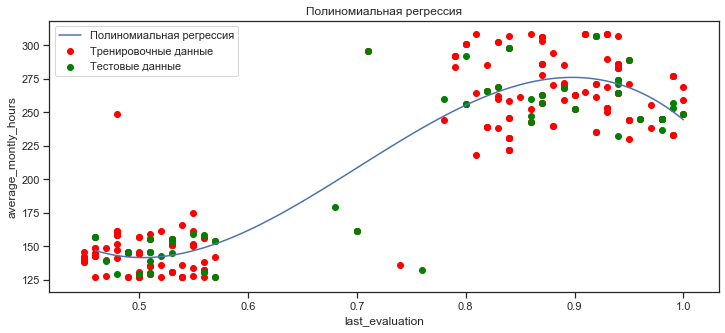

In [224]:
def viz_polymonial():
    plt.scatter(X_train, y_train, c='red')
    plt.scatter(X_test, y_test, c='green')
    x = np.linspace(min(X_test), max(X_train), 100)
    y = pol_reg.predict(poly_reg.fit_transform(x))
    plt.plot(x, y, 'b')
    plt.title('Полиномиальная регрессия')
    plt.xlabel('last_evaluation')
    plt.ylabel('average_montly_hours')
    plt.legend(['Полиномиальная регрессия', 'Тренировочные данные', 'Тестовые данные'])
    plt.show()
    return
viz_polymonial()